In [5]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression 

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

from collections import Counter
from sklearn.svm import SVC,SVR

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn import tree

In [6]:
# DATA LOADING AND UNDERSTANDING

In [7]:
data = pd.read_csv("C:/Users/VEENA SRI/ipl_matches.csv")

In [8]:
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [9]:
data.shape

(756, 18)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
data.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [13]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
data.select_dtypes(include=["object"]).columns.tolist()

['Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [15]:
data.select_dtypes(include=["number"]).columns.tolist()

['id', 'dl_applied', 'win_by_runs', 'win_by_wickets']

In [16]:
# data.dtypes

In [17]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [175]:
data["winner"].value_counts()

winner
7     109
0     100
6      92
10     83
4      82
2      76
8      75
11     58
1      29
9      27
3      13
5       6
Name: count, dtype: int64

In [19]:
# DATA CLEANING

In [20]:
data.isna().sum().sort_values(ascending=False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
Season               0
id                   0
team1                0
date                 0
dl_applied           0
result               0
toss_decision        0
toss_winner          0
team2                0
win_by_runs          0
win_by_wickets       0
venue                0
dtype: int64

In [21]:
data['year'] = data['Season'].str.split('-').str[1]

In [22]:
data['year'].unique()

array(['2017', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2018', '2019'], dtype=object)

In [23]:
# data['year'].nunique()

In [24]:
data['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [25]:
data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [26]:
# data['city'].nunique()

In [27]:
# data[['city']] = data[['city']].replace('Bangalore', 'Bengaluru')

In [28]:
data['venue'].nunique()

41

In [29]:
dup_map = {'Rajiv Gandhi Intl. Cricket Stadium': 'Rajiv Gandhi International Stadium, Uppal',
           'Subrata Roy Sahara Stadium': 'Maharashtra Cricket Association Stadium',
           'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
           'IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
           'M Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',  
           'MA Chidambaram Stadium, Chepauk': 'M. A. Chidambaram Stadium',
           'Feroz Shah Kotla Ground': 'Feroz Shah Kotla',
           'ACA-VDCA Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'}

In [30]:
data['venue'] = data['venue'].replace(dup_map)

In [31]:
data['player_of_match'].nunique()

226

In [32]:
# teams = data[['team1', 'team2']].values.ravel()

# team_count = pd.Series(teams).value_counts()
# print(team_count)

In [33]:
drop_columns = ["id", "city", "Season", "date", "umpire3"]
data = data.drop(columns = drop_columns)

In [34]:
data = data.dropna(subset=['winner'])

In [35]:
data = data.dropna()

In [36]:
data[['team1', 'team2','toss_winner','winner']] = data[['team1', 'team2','toss_winner','winner']].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

In [37]:
data[['team1', 'team2','toss_winner','winner']] = data[['team1', 'team2','toss_winner','winner']].replace('Pune Warriors', 'Rising Pune Supergiants')

In [38]:
data[['team1', 'team2','toss_winner','winner']] = data[['team1', 'team2','toss_winner','winner']].replace('Delhi Daredevils', 'Delhi Capitals')

In [39]:
unique_teams = pd.unique(data[['team1', 'team2', 'toss_winner', 'winner']].values.ravel()) 
print(unique_teams)

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Capitals' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [40]:
duplicate_rows = data[data.duplicated(keep=False)]

In [41]:
duplicate_rows.sum().sum()

np.int64(0)

In [42]:
data.shape

(750, 14)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            750 non-null    object
 1   team2            750 non-null    object
 2   toss_winner      750 non-null    object
 3   toss_decision    750 non-null    object
 4   result           750 non-null    object
 5   dl_applied       750 non-null    int64 
 6   winner           750 non-null    object
 7   win_by_runs      750 non-null    int64 
 8   win_by_wickets   750 non-null    int64 
 9   player_of_match  750 non-null    object
 10  venue            750 non-null    object
 11  umpire1          750 non-null    object
 12  umpire2          750 non-null    object
 13  year             750 non-null    object
dtypes: int64(3), object(11)
memory usage: 87.9+ KB


In [44]:
data

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,year
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,C Shamshuddin,2019
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,2019
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,2019
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sundaram Ravi,Bruce Oxenford,2019


In [45]:
# OUTLIER

In [46]:
data['valid']= data.apply (lambda row:row['winner'] in [row['team1'],row['team2']], axis=1)

In [47]:
data['valid'].nunique()

1

In [48]:
 data.drop(columns=['valid'], inplace =True) 

In [49]:
# numeric_column = data[["dl_applied","win_by_runs","win_by_wickets"]]

In [50]:
# plt.figure(figsize=(10,30))
# for i in range(len(numeric_column.columns)):
#     plt.subplot(5,3,i+1)
#     sns.boxplot(y=numeric_column.columns[i],data = data, palette='pastel')
# plt.show()

In [51]:
# #since classifier no need for pair plot

# plt.figure(figsize=(12,8))
# sns.pairplot(data)
# plt.title('PAIR PLOTS')
# plt.show()

In [52]:
# plt.figure(figsize=(8,4))
# sns.heatmap(numeric_column.corr(), annot= True, fmt='.2f')
# plt.show()

In [53]:
## UNIVARIATE ANALYSIS

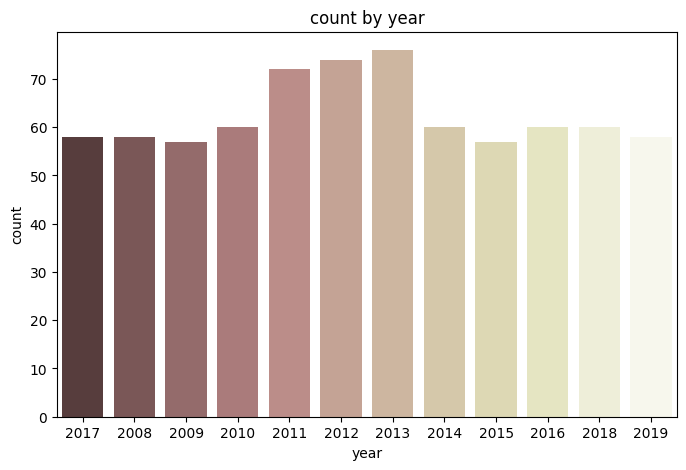

In [54]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'year', palette = 'pink', data = data)
plt.xlabel('year')
plt.ylabel('count')
plt.title('count by year')
plt.show()

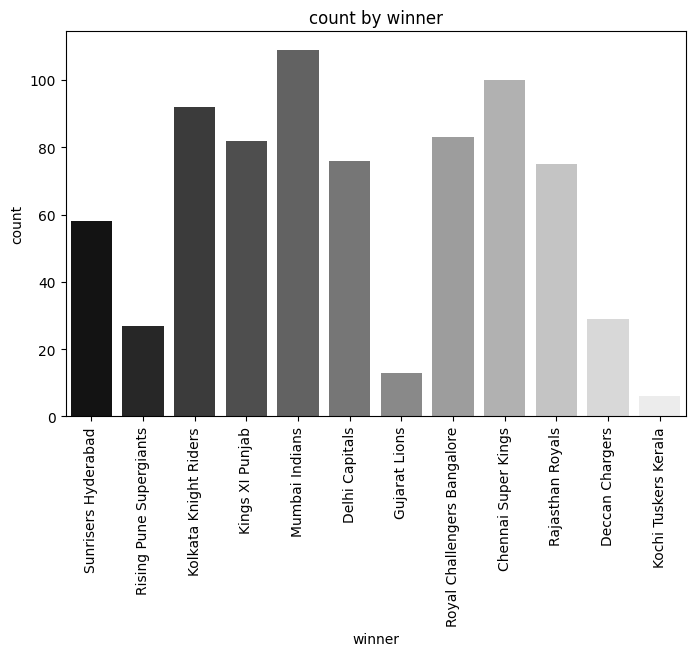

In [55]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'winner', palette = 'grey', data = data)
plt.xlabel('winner')
plt.ylabel('count')
plt.title('count by winner')
plt.xticks(rotation=90)
plt.show()

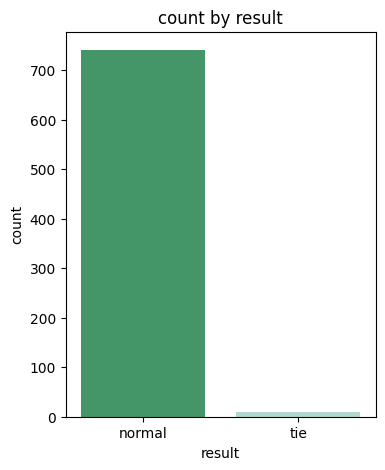

In [56]:
plt.figure(figsize=(4, 5))
ax = sns.countplot(x = 'result', palette = 'BuGn_r', data = data)
plt.xlabel('result')
plt.ylabel('count')
plt.title('count by result')
plt.show()

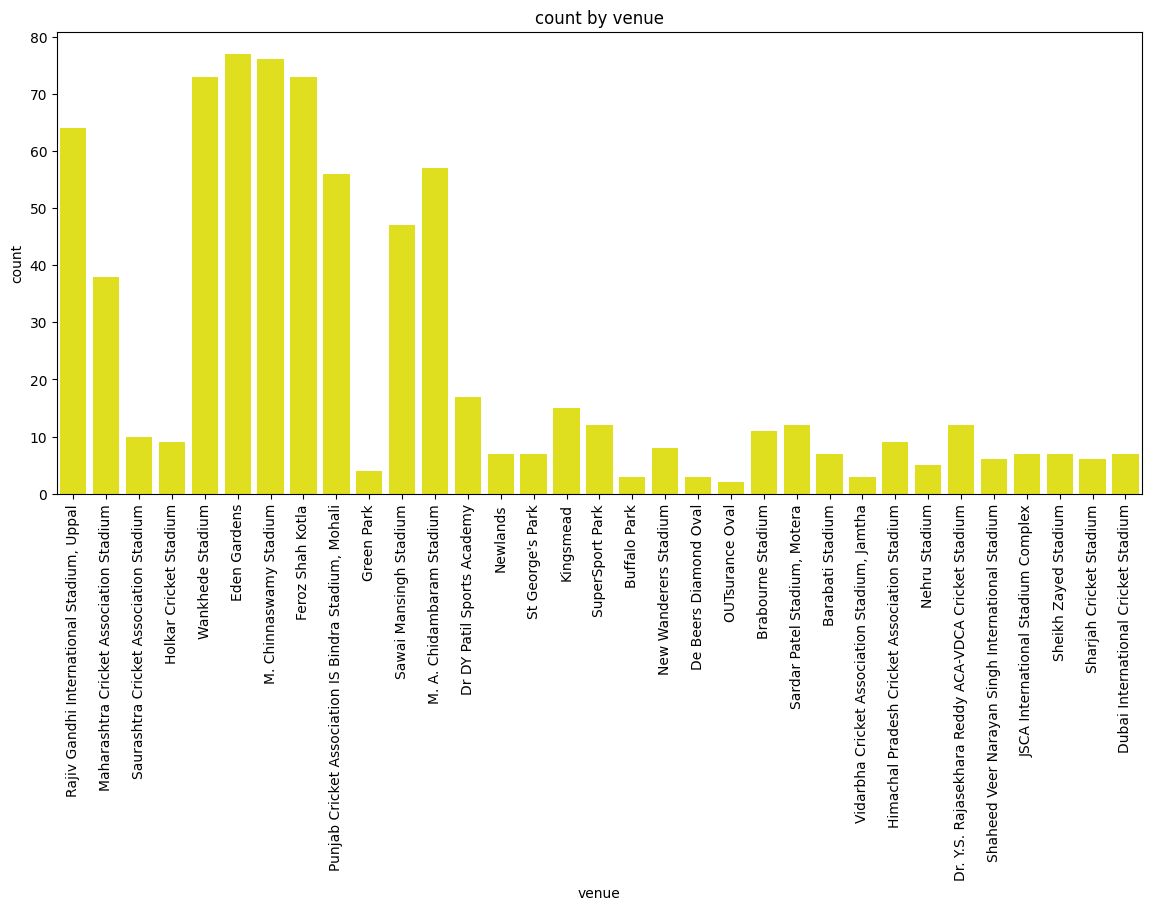

In [57]:
plt.figure(figsize=(14, 6))
sns.countplot(x='venue', data = data, color='yellow')
plt.xticks(rotation=90)
plt.xlabel('venue')
plt.ylabel('count')
plt.title('count by venue')
plt.show()

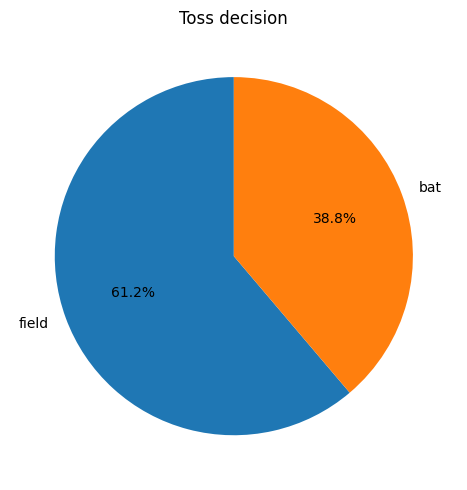

In [58]:
count = data['toss_decision'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss decision')
plt.tight_layout()  # keeps everything inside the figure area
plt.show()

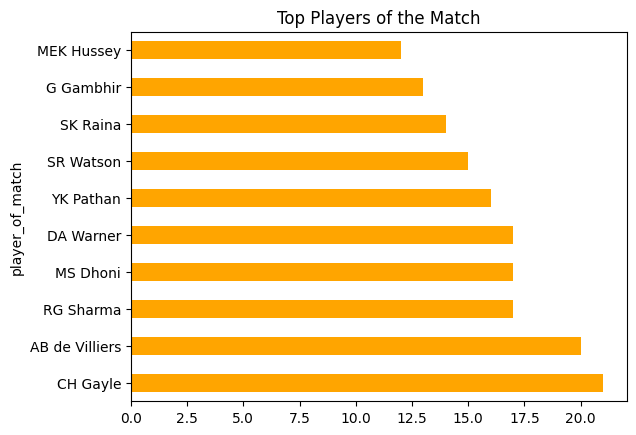

In [59]:
data['player_of_match'].value_counts().head(10).plot(kind='barh', title='Top Players of the Match', color = 'orange')
plt.show()

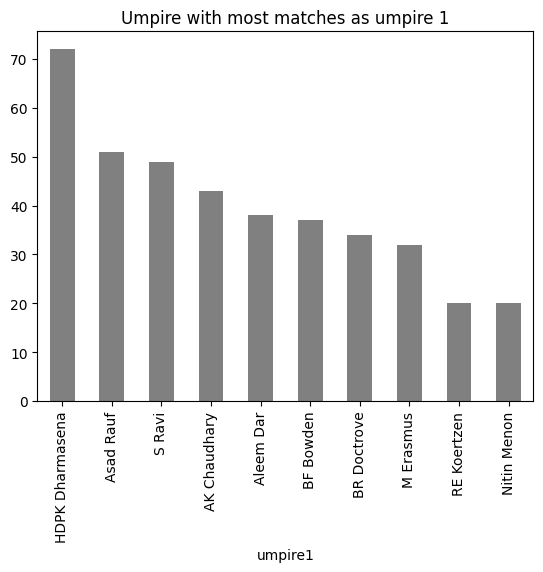

In [60]:
data['umpire1'].value_counts().head(10).plot(kind='bar', title='Umpire with most matches as umpire 1', color = 'grey')
plt.show()

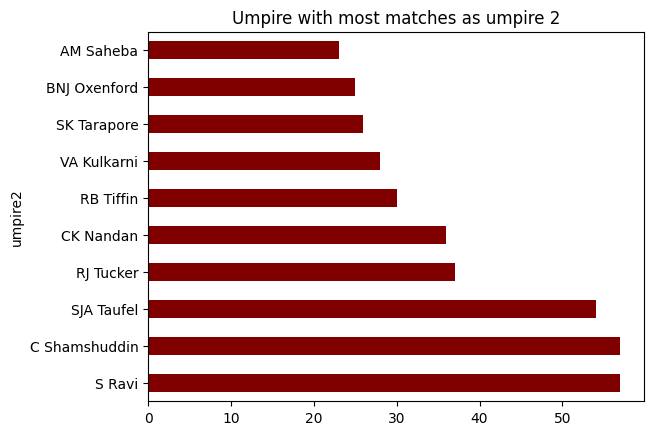

In [61]:
data['umpire2'].value_counts().head(10).plot(kind='barh', title='Umpire with most matches as umpire 2', color ='maroon')
plt.show()

In [62]:
# bivariate

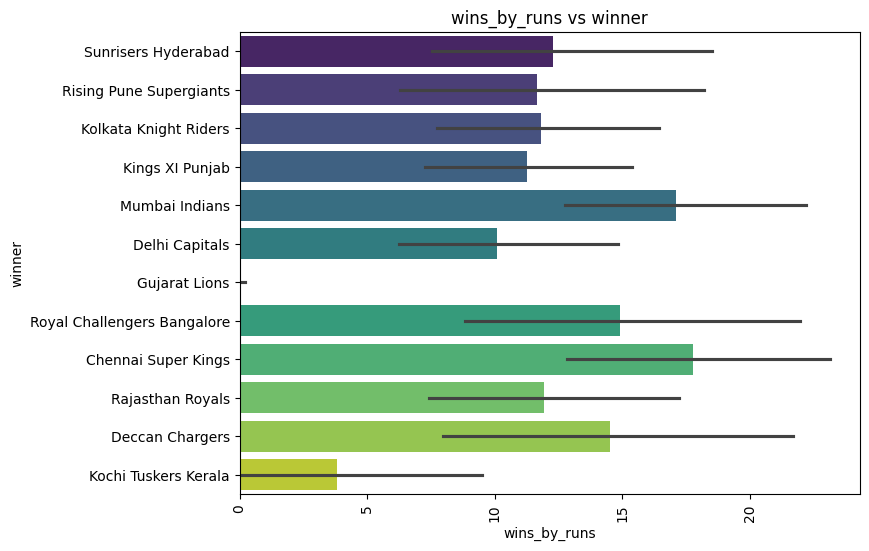

In [63]:
plt.figure(figsize=(8, 6))
sns.barplot(x='win_by_runs', y='winner', data = data, palette ='viridis')
plt.title("wins_by_runs vs winner")
plt.xlabel("wins_by_runs")
plt.ylabel("winner")
plt.xticks(rotation=90)
plt.show()

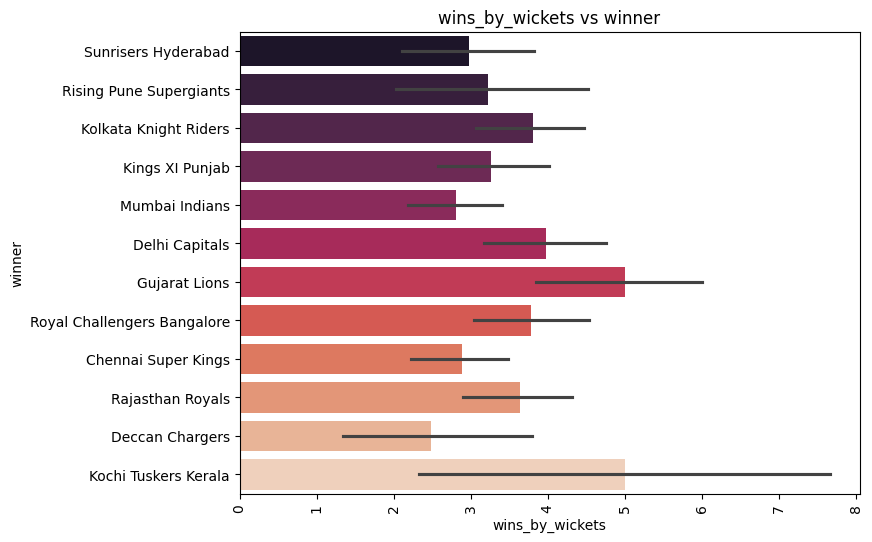

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x='win_by_wickets', y='winner', data = data, palette ='rocket')
plt.title("wins_by_wickets vs winner")
plt.xlabel("wins_by_wickets")
plt.ylabel("winner")
plt.xticks(rotation=90)
plt.show()

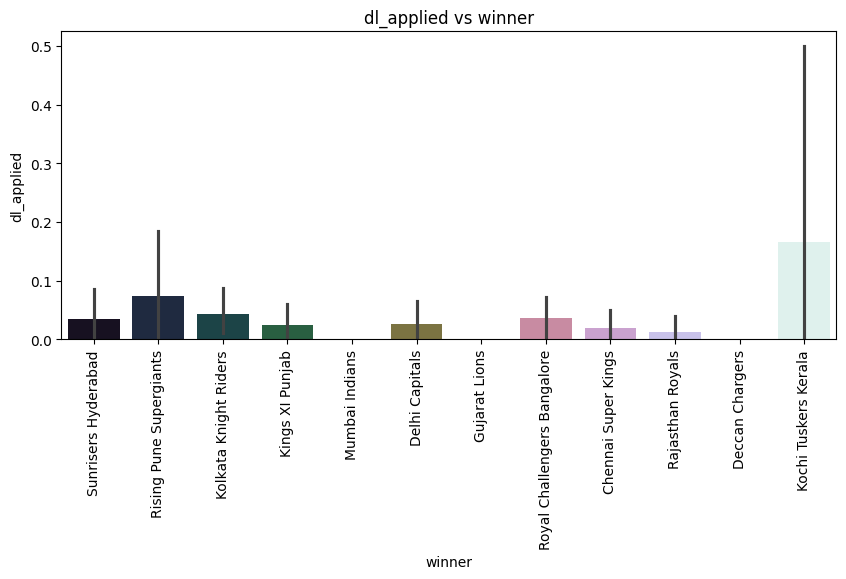

In [65]:
plt.figure(figsize=(10,4))
sns.barplot( x= 'winner', y= 'dl_applied', data = data, palette='cubehelix')
plt.title('dl_applied vs winner')
plt.xlabel('winner')
plt.ylabel('dl_applied')
plt.xticks(rotation=90),
plt.show()

In [66]:
# MULTIVARIATE

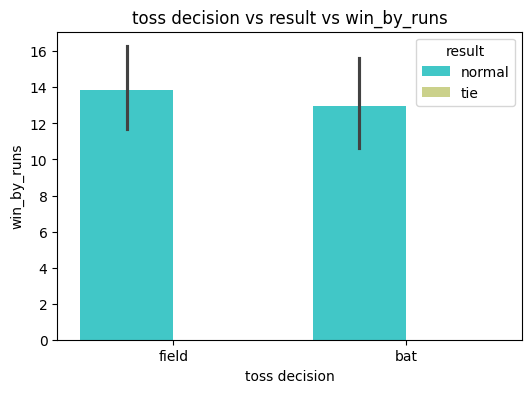

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(x='toss_decision', y='win_by_runs', hue='result', data = data, palette='rainbow')
plt.xlabel('toss decision')
plt.ylabel('win_by_runs')
plt.title('toss decision vs result vs win_by_runs')
plt.show()

In [68]:
# MACHINE LEARNING

In [69]:
#data_unique = pd.unique(data[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']].values.ravel())
#data_unique

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            750 non-null    object
 1   team2            750 non-null    object
 2   toss_winner      750 non-null    object
 3   toss_decision    750 non-null    object
 4   result           750 non-null    object
 5   dl_applied       750 non-null    int64 
 6   winner           750 non-null    object
 7   win_by_runs      750 non-null    int64 
 8   win_by_wickets   750 non-null    int64 
 9   player_of_match  750 non-null    object
 10  venue            750 non-null    object
 11  umpire1          750 non-null    object
 12  umpire2          750 non-null    object
 13  year             750 non-null    object
dtypes: int64(3), object(11)
memory usage: 87.9+ KB


In [71]:
# ENCODING

In [72]:
categorical_cols = ['team1','team2','toss_winner','toss_decision','winner']

label = LabelEncoder()
for column in data.columns:
    data[column] =  label.fit_transform(data[column])

data = data.drop(columns=['city', 'venue', 'player_of_match', 'win_by_runs', 'win_by_wickets', 'umpire1', 'umpire2', 'dl_applied', 'result', 'date', 'year'], errors='ignore')
# data

In [73]:
x = data.drop(['winner'], axis=1)

In [74]:
x

,team1,team2,toss_winner,toss_decision
0,11,10,10,1
1,7,9,9,1
2,3,6,6,1
3,9,4,4,1
5,3,11,11,1
...,...,...,...,...
750,0,4,4,1
751,6,7,7,1
752,0,7,0,0
754,2,0,0,1


In [75]:
label = LabelEncoder()
y = data['winner'] =  label.fit_transform(data['winner'])


In [76]:
y

array([11,  9,  6,  4, 11,  7,  4,  2,  7,  6,  7,  3,  6,  2,  7,  9,  6,
       11, 10, 11,  7,  3,  7,  9,  4,  6,  9,  6,  3,  6, 11,  9,  7,  4,
       11,  7,  9,  2,  9,  2,  4,  9,  7,  6,  3, 11,  4,  2,  4,  2, 11,
        7,  9, 10,  9,  6,  7,  7,  6,  0,  2, 10,  6,  8,  2,  0,  8,  4,
        8,  0,  1,  4,  0,  7,  2,  4,  8,  2, 10,  4,  7,  8,  4,  1,  7,
        0,  6,  8,  7,  0,  6,  8,  4,  6,  7,  4,  2,  7,  4,  8,  7,  0,
        2,  8,  4, 10,  4,  2,  8, 10,  6,  8,  0,  8,  0,  8,  7, 10,  2,
        1,  0,  6,  1,  2,  8,  4,  1,  2,  4,  1,  7,  8, 10,  4,  2,  0,
        7, 10,  8,  0,  4, 10,  0,  8,  2,  1,  8,  0,  2,  4,  0,  7,  2,
        1, 10,  7,  2, 10,  8,  4,  0,  1,  4,  2,  6, 10,  6,  0,  2, 10,
        1, 10,  1,  6,  7,  2,  6,  1,  2, 10,  0,  7, 10,  0,  1,  8, 10,
        1,  4,  7, 10,  8,  7,  8,  6,  2,  8,  7,  2,  7,  0,  2,  6, 10,
        0,  7,  4,  2,  8,  0,  8,  6,  1,  4,  1, 10,  4,  7,  1,  7,  0,
       10,  2,  1,  7,  6

In [77]:
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [78]:
count = Counter(y)
print(count)

Counter({np.int64(7): 109, np.int64(0): 100, np.int64(6): 92, np.int64(10): 83, np.int64(4): 82, np.int64(2): 76, np.int64(8): 75, np.int64(11): 58, np.int64(1): 29, np.int64(9): 27, np.int64(3): 13, np.int64(5): 6})


In [79]:
sm = SMOTE(random_state = 100, k_neighbors= 4)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [80]:
print(Counter(y_train_sm))

Counter({np.int64(1): 87, np.int64(4): 87, np.int64(8): 87, np.int64(0): 87, np.int64(2): 87, np.int64(7): 87, np.int64(3): 87, np.int64(10): 87, np.int64(9): 87, np.int64(11): 87, np.int64(6): 87, np.int64(5): 87})


In [81]:
# st = StandardScaler()
# x_train = st.fit_transform(x_train_sm)
# x = st.transform(x_test)

In [82]:
x_train_sm = x_train
y_train_sm = y_train

In [83]:
# logistic regression

In [84]:
# cross validation

model = LogisticRegression()
scores = cross_val_score(model, x_train_sm, y_train_sm, cv=5)
print(" logisticregression cross validation accuracy:", scores.mean())

 logisticregression cross validation accuracy: 0.22333333333333333


In [85]:
logistic = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs', n_jobs=-1)
logistic.fit(x_train_sm, y_train_sm)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', n_jobs=-1)

In [86]:
# accuracy

y_train_pred = logistic.predict(x_train_sm)
y_test_pred  = logistic.predict(x_test)

train_acc = accuracy_score(y_train_sm, y_train_pred)
test_acc  = accuracy_score(y_test,  y_test_pred)

print(f"logisticregression train accuracy: {train_acc:.2f}")
print(f"logisticregression accuracy: {test_acc :.2f}")

logisticregression train accuracy: 0.18
logisticregression accuracy: 0.14


In [168]:
# Logistic=LogisticRegression(penalty='l2') #Ridge regularization
# Logistic.fit(x_train_sm,y_train_sm)
# class_pred = Logistic.predict((x_test))

# test_acc  = accuracy_score(y_test, class_pred)
# print(" logisticregression tuning accuracy :",test_acc)

In [169]:
Logistic=LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Logistic.fit(x_train_sm,y_train_sm)
class_pred=Logistic.predict((x_test))

test_acc  = accuracy_score(y_test, class_pred)
print("logisticregression tuning accuracy :",test_acc)

logisticregression tuning accuracy : 0.17333333333333334


In [167]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train_sm,y_train_sm)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print(best_model )
print(" logisticregression accuracy Score:", accuracy_score(y_test, y_pred))

LogisticRegression(C=0.1, solver='liblinear')
 logisticregression accuracy Score: 0.23333333333333334


In [90]:
# cm = confusion_matrix(y_test,  y_test_pred)
# cm

In [91]:
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.10      0.67      0.17         3
           2       0.00      0.00      0.00        19
           3       0.04      0.50      0.07         2
           4       0.00      0.00      0.00        22
           5       0.05      1.00      0.09         1
           6       0.18      0.09      0.12        23
           7       0.60      0.14      0.22        22
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         2
          10       0.11      0.14      0.12        14
          11       0.24      0.62      0.34         8

    accuracy                           0.14       150
   macro avg       0.15      0.29      0.13       150
weighted avg       0.19      0.14      0.12       150



In [92]:
# KNN

In [93]:
# cross validation

model = KNN()
scores = cross_val_score(model, x_train_sm, y_train_sm, cv=5)
print(" KNN cross validation accuracy:", scores.mean())

 KNN cross validation accuracy: 0.48


In [94]:
knn = KNN(n_neighbors=5, metric='hamming', p=2, n_jobs=-1)          
knn.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(metric='hamming', n_jobs=-1)

In [95]:
y_train_pred = knn.predict(x_train_sm)
y_test_pred  = knn.predict(x_test)

print(f" KNN train accuracy: {accuracy_score(y_train_sm, y_train_pred):.2f}")
print(f" KNN test  accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")


 KNN train accuracy: 0.64
 KNN test  accuracy: 0.44


In [96]:
# cm = confusion_matrix(y_test, y_test_pred)
# print("confusion matrix:", cm)

In [97]:
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.37      0.62      0.47        16
           1       0.00      0.00      0.00         3
           2       0.52      0.58      0.55        19
           3       0.33      0.50      0.40         2
           4       0.38      0.45      0.42        22
           5       0.00      0.00      0.00         1
           6       0.50      0.39      0.44        23
           7       0.52      0.50      0.51        22
           8       0.70      0.39      0.50        18
           9       0.00      0.00      0.00         2
          10       0.44      0.29      0.35        14
          11       0.38      0.38      0.38         8

    accuracy                           0.44       150
   macro avg       0.35      0.34      0.33       150
weighted avg       0.47      0.44      0.44       150



In [98]:
def elbow(k):
    test_error = []
    for i in k:
       clf = KNN(n_neighbors = i)
       clf.fit(x_train, y_train)
       tmp = clf.predict(x_test)
       tmp = accuracy_score(tmp, y_test)
       error = 1-tmp
       test_error.append(error)

    return test_error   

In [99]:
k = list(range(2,30,2))
test = elbow(k)

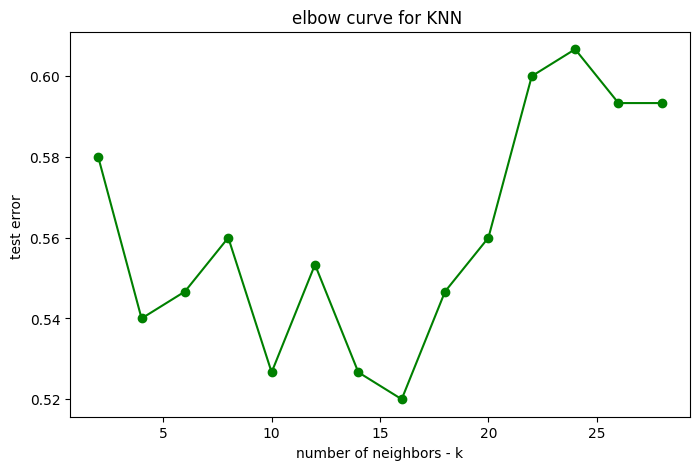

In [100]:
# plotting the curves

plt.figure(figsize=(8,5))
plt.plot(k, test, marker='o', color='green')
plt.xlabel('number of neighbors - k')
plt.ylabel('test error ')
plt.title('elbow curve for KNN ')
plt.show()

In [101]:
knn = KNN(n_neighbors= 26, metric='hamming', p=2, n_jobs=-1)          
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='hamming', n_jobs=-1, n_neighbors=26)

In [102]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print(f" KNN train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" KNN test  accuracy: {accuracy_score(y_test,  y_test_pred):.2f}")


 KNN train accuracy: 0.58
 KNN test  accuracy: 0.48


In [103]:
# SVM

In [104]:
# cross validation

model = SVC()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" SVC cross validation accuracy:", scores.mean())

 SVC cross validation accuracy: 0.3516666666666667


In [105]:
svm = SVC(kernel='rbf', C=10, class_weight='balanced', random_state=100)
svm.fit(x_train, y_train)

SVC(C=10, class_weight='balanced', random_state=100)

In [106]:
y_train_pred = svm.predict(x_train)
y_test_pred  = svm.predict(x_test)

print(f" SVC train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" SVC test  accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 SVC train accuracy: 0.55
 SVC test  accuracy: 0.41


In [107]:
param_grid = {'C':[0.1,1,10,100], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}
grid_search = GridSearchCV(estimator=SVC(),param_grid = param_grid, cv=10, verbose=2)
grid_search.fit(x_train,y_train)

best_param = grid_search.best_params_
best_score= grid_search.best_score_

print(f" SVM best hyperparameters: {best_param}")
print(f" SVM best score: {best_score:.2f}")

best_classifier = grid_search.best_estimator_
best_classifier.fit(x_train,y_train)



Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=sca

SVC(C=100)

In [108]:
svm = SVC(kernel='rbf', C=100, gamma ='scale', class_weight='balanced', random_state=100)
svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
y_test_pred  = svm.predict(x_test)

print(f" SVC tuned train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" SVC tuned test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 SVC tuned train accuracy: 0.62
 SVC tuned test accuracy: 0.43


In [109]:
cr = classification_report(y_test, y_test_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

           0      0.500     0.688     0.579        16
           1      0.091     0.333     0.143         3
           2      0.520     0.684     0.591        19
           3      0.333     0.500     0.400         2
           4      0.522     0.545     0.533        22
           5      0.200     1.000     0.333         1
           6      0.500     0.304     0.378        23
           7      0.429     0.273     0.333        22
           8      0.000     0.000     0.000        18
           9      0.000     0.000     0.000         2
          10      0.500     0.357     0.417        14
          11      0.438     0.875     0.583         8

    accuracy                          0.427       150
   macro avg      0.336     0.463     0.358       150
weighted avg      0.413     0.427     0.402       150



In [110]:
# cm = confusion_matrix(y_test, y_test_pred)
# print("confusion matrix:", cm)

In [111]:
# random forest

In [112]:
# cross validation

model = RandomForestClassifier()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" random forest cross validation accuracy:", scores.mean())

 random forest cross validation accuracy: 0.5216666666666667


In [113]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=2, class_weight='balanced', n_jobs=-1, random_state=100)
rf.fit(x_train, y_train)         

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1, random_state=100)

In [114]:
y_train_pred = rf.predict(x_train)
y_test_pred  = rf.predict(x_test)

print(f" random forest train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" random forest test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 random forest train accuracy: 0.70
 random forest test accuracy: 0.53


In [115]:
cr = classification_report(y_test, y_test_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

           0      0.562     0.562     0.562        16
           1      0.000     0.000     0.000         3
           2      0.609     0.737     0.667        19
           3      0.500     1.000     0.667         2
           4      0.619     0.591     0.605        22
           5      1.000     1.000     1.000         1
           6      0.667     0.522     0.585        23
           7      0.556     0.455     0.500        22
           8      0.471     0.444     0.457        18
           9      0.250     0.500     0.333         2
          10      0.444     0.286     0.348        14
          11      0.429     0.750     0.545         8

    accuracy                          0.533       150
   macro avg      0.509     0.571     0.522       150
weighted avg      0.549     0.533     0.533       150



In [116]:
# print("confusion matrix:", confusion_matrix(y_test, y_test_pred))

In [117]:
param_grid={'n_estimators': [50,100,200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2,5,10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=100), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(" random forest best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(x_test)
print(f" random forest best model accuracy:, {accuracy_score(y_test, y_pred_best):.2f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
 random forest best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
 random forest best model accuracy:, 0.49


In [118]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=10, class_weight='balanced', n_jobs=-1, random_state=100)
rf.fit(x_train, y_train)  

y_train_pred = rf.predict(x_train)
y_test_pred  = rf.predict(x_test)

print(f" random forest tuned train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" random forest tuned test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 random forest tuned train accuracy: 0.60
 random forest tuned test accuracy: 0.49


In [119]:
# descion tree

In [120]:
# cross validation

model = DecisionTreeClassifier()
scores = cross_val_score(model, x_train, y_train, cv=5)
print("cross-validation accuracy:", scores.mean())

cross-validation accuracy: 0.48999999999999994


In [121]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, class_weight='balanced', random_state=100)
dt.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [122]:
y_train_pred = dt.predict(x_train)
y_test_pred  = dt.predict(x_test)

print(f" decision tree train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" decision tree test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 decision tree train accuracy: 0.70
 decision tree test accuracy: 0.50


In [123]:
cr = classification_report(y_test, y_test_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.12      0.33      0.18         3
           2       0.46      0.63      0.53        19
           3       0.50      1.00      0.67         2
           4       0.59      0.45      0.51        22
           5       1.00      1.00      1.00         1
           6       0.62      0.43      0.51        23
           7       0.62      0.45      0.53        22
           8       0.56      0.56      0.56        18
           9       0.12      0.50      0.20         2
          10       0.50      0.29      0.36        14
          11       0.43      0.75      0.55         8

    accuracy                           0.50       150
   macro avg       0.51      0.58      0.51       150
weighted avg       0.55      0.50      0.51       150



In [124]:
# print("confusion matrix:  ", confusion_matrix(y_test, y_test_pred))

In [125]:
dt_clf = DecisionTreeClassifier(random_state=100)

param_grid = {'max_depth': [3,5,10,None], 'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator = dt_clf, param_grid =param_grid, cv=5, scoring ='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print(best_model)

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print('decision tree best parameters: ', grid_search.best_params_)
print('decision tree accuracy: ', accuracy)

DecisionTreeClassifier(max_depth=10, random_state=100)
decision tree best parameters:  {'criterion': 'gini', 'max_depth': 10}
decision tree accuracy:  0.49333333333333335


In [126]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, class_weight='balanced', random_state=100)
dt.fit(x_train, y_train) 

y_train_pred = dt.predict(x_train)
y_test_pred  = dt.predict(x_test)

print(f" decision tree train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" decision tree test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 decision tree train accuracy: 0.70
 decision tree test accuracy: 0.49


In [127]:
# naive bayes

In [128]:
model =  BernoulliNB()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" NB cross validation accuracy:", scores.mean())

 NB cross validation accuracy: 0.25833333333333336


In [129]:
bnb = BernoulliNB() 
bnb.fit(x_train, y_train)

BernoulliNB()

In [130]:
y_train_pred = bnb.predict(x_train)
y_test_pred  = bnb.predict(x_test)

print(f" naivebayes train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" naivebayes test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 naivebayes train accuracy: 0.27
 naivebayes test accuracy: 0.22


In [131]:
cr = classification_report(y_test, y_test_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        23
           7       0.14      0.77      0.24        22
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         8

    accuracy                           0.22       150
   macro avg       0.06      0.15      0.08       150
weighted avg       0.08      0.22      0.11       150



In [132]:
# print("confusion matrix:", confusion_matrix(y_test, y_test_pred))

In [133]:
nb = BernoulliNB()       
param_grid = {'alpha':[0.01, 0.1, 0.5, 1.0, 2.0], 'fit_prior':[True, False]}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv= 5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)  

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(" naivebayes best parameters :", grid_search.best_params_)
print(" naivebayes test accuracy :", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 naivebayes best parameters : {'alpha': 1.0, 'fit_prior': True}
 naivebayes test accuracy : 0.22


In [134]:
bnb = BernoulliNB(alpha= 1.0, fit_prior= True) 
bnb.fit(x_train, y_train)

y_train_pred = bnb.predict(x_train)
y_test_pred  = bnb.predict(x_test)

print(f" naivebayes train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" naivebayes test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 naivebayes train accuracy: 0.27
 naivebayes test accuracy: 0.22


In [135]:
# print("confusion matrix:",  confusion_matrix(y_test, y_pred))

In [136]:
# boosting - XGboost

In [137]:
model = XGBClassifier( )
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" xgb boost cross validation accuracy:", scores.mean())

 xgb boost cross validation accuracy: 0.5316666666666667


In [138]:
xg = XGBClassifier(n_estimators=50, random_state=100)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [139]:
ypt = xg.predict(x_train)
yp = xg.predict(x_test)

print(" xgb train accuracy:", accuracy_score(y_train, ypt))
print(" xgb test accuracy:", accuracy_score(y_test,yp))

 xgb train accuracy: 0.7183333333333334
 xgb test accuracy: 0.58


In [140]:
xgb = XGBClassifier( objective='multi:softprob', num_class=12, eval_metric='mlogloss', random_state=100, n_jobs=-1)

param_dist = {"n_estimators":[200, 800], "learning_rate":[0.01, 0.3], "max_depth":[3, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

rnd = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=cv, n_jobs=-1, random_state=100)
rnd.fit(x_train, y_train)

best_xgb = rnd.best_estimator_
y_pred = best_xgb.predict(x_test)
# y_train_pred = best_xgb.predict(x_train)

print(" xgb hyper‑parameters :", rnd.best_params_)
# print(" xgb train accuracy :", f"{accuracy_score(y_train, y_train_pred):.2f}")
print(" xgb test accuracy :", f"{accuracy_score(y_test,  y_pred):.2f}")

 xgb hyper‑parameters : {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
 xgb test accuracy : 0.53


In [141]:
xg = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=100)
xg.fit(x_train,y_train)

ypt = xg.predict(x_train)
yp = xg.predict(x_test)

print(" xgb train accuracy:", accuracy_score(y_train, ypt))
print(" xgb test accuracy:", accuracy_score(y_test,yp))

 xgb train accuracy: 0.7166666666666667
 xgb test accuracy: 0.5666666666666667


In [142]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        16
           1       0.00      0.00      0.00         3
           2       0.62      0.42      0.50        19
           3       0.33      0.50      0.40         2
           4       0.76      0.59      0.67        22
           5       0.00      0.00      0.00         1
           6       0.60      0.52      0.56        23
           7       0.55      0.50      0.52        22
           8       0.56      0.50      0.53        18
           9       0.00      0.00      0.00         2
          10       0.42      0.36      0.38        14
          11       0.40      0.75      0.52         8

    accuracy                           0.53       150
   macro avg       0.40      0.42      0.39       150
weighted avg       0.55      0.53      0.53       150



In [170]:
from sklearn.pipeline import make_pipeline

def sampling_model(x_train, x_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs', n_jobs=-1),
        "KNN": make_pipeline(KNN(n_neighbors=5, metric='hamming', p=2, n_jobs=-1)),
        "SVM": make_pipeline(SVC(kernel='linear', C=10, gamma ='scale', class_weight='balanced', random_state=100)),
        "Bernoulli NB":  BernoulliNB(),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, class_weight='balanced', random_state=100),
        "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=10, class_weight='balanced', n_jobs=-1, random_state=100),
        "XGBoost":XGBClassifier( objective='multi:softprob', num_class=12, eval_metric='mlogloss', random_state=100, n_jobs=-1)
    }

    rows = []
    for name, clf in models.items():
        clf.fit(x_train, y_train)
        rows.append({"model": name, "train accuracy": accuracy_score(y_train, clf.predict(x_train)), "test accuracy" : accuracy_score(y_test,  clf.predict(x_test))})

    return pd.DataFrame(rows).sort_values("test accuracy", ascending=False).reset_index(drop=True)

In [171]:
summary = sampling_model(x_train, x_test, y_train, y_test)
print(" model with sampling before tuning: \n  ",summary)

 model with sampling before tuning: 
                    model  train accuracy  test accuracy
0              XGBoost        0.718333       0.566667
1        Decision Tree        0.698333       0.500000
2        Random Forest        0.596667       0.493333
3                  KNN        0.643333       0.440000
4         Bernoulli NB        0.265000       0.220000
5  Logistic Regression        0.183333       0.140000
6                  SVM        0.206667       0.120000


In [173]:
def sampling_model_after_tuning(x_train, x_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
        "KNN": make_pipeline(KNN(n_neighbors= 26, metric='hamming', p=2, n_jobs=-1)),
        "SVM": make_pipeline(SVC(kernel='rbf', C=100, gamma ='scale', class_weight='balanced', random_state=100)),
        "Bernoulli NB":  BernoulliNB(alpha= 1.0, fit_prior= True),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, class_weight='balanced', random_state=100),
        "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=2, class_weight='balanced', n_jobs=-1, random_state=100),
        "XGBoost":XGBClassifier(n_estimators=50, random_state=100)
    }

    rows = []
    for name, clf in models.items():
        clf.fit(x_train, y_train)
        rows.append({"model": name, "train accuracy": accuracy_score(y_train, clf.predict(x_train)), "test accuracy" : accuracy_score(y_test,  clf.predict(x_test))})

    return pd.DataFrame(rows).sort_values("test accuracy", ascending=False).reset_index(drop=True)

In [174]:
summary = sampling_model_after_tuning(x_train, x_test, y_train, y_test)
print(" model with sampling after tuning: \n  ",summary)

 model with sampling after tuning: 
                    model  train accuracy  test accuracy
0              XGBoost        0.718333       0.580000
1        Random Forest        0.698333       0.533333
2        Decision Tree        0.696667       0.486667
3                  KNN        0.580000       0.480000
4                  SVM        0.620000       0.426667
5         Bernoulli NB        0.265000       0.220000
6  Logistic Regression        0.231667       0.173333


In [145]:
# gradiant boost

In [146]:
model = GradientBoostingClassifier( )
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" gradiant boost cross validation accuracy:", scores.mean())

 gradiant boost cross validation accuracy: 0.5183333333333333


In [147]:
grad = GradientBoostingClassifier(n_estimators=50, random_state=40)
grad.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=40)

In [148]:
yp = grad.predict(x_test)
ypt = grad.predict(x_train)

print(" gradiantboost train accuracy :",accuracy_score(y_train,ypt))
print(" gradiantboost test accuracy :",accuracy_score(y_test,yp))

 gradiantboost train accuracy : 0.7133333333333334
 gradiantboost test accuracy : 0.54


In [149]:
#adaboost

In [150]:
model = AdaBoostClassifier( )
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" adaboost cross validation accuracy:", scores.mean())

 adaboost cross validation accuracy: 0.305


In [151]:
ada = AdaBoostClassifier(n_estimators=50, random_state=100)
ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=100)

In [152]:
yp = ada.predict(x_train)
yp = ada.predict(x_test)

print(" ada train accuracy:", accuracy_score(y_train, y_train_pred))
print(" ada test accuracy:", accuracy_score(y_test,yp))

 ada train accuracy: 0.265
 ada test accuracy: 0.26


In [153]:
# stump = DecisionTreeClassifier(max_depth=1, random_state=100, class_weight="balanced")

# ada = AdaBoostClassifier(estimator = stump, random_state = 100)

# param_grid = {"n_estimators":[50, 100, 200, 400], "learning_rate":[0.01, 0.05, 0.1, 0.5, 1.0], "estimator__max_depth":[1, 2, 3]}

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# grid = GridSearchCV(estimator= ada, param_grid= param_grid, cv= cv, scoring="accuracy",n_jobs=-1, verbose=1)
# grid.fit(x_train, y_train)

# best_ada = grid.best_estimator_
# y_pred = best_ada.predict(x_test)
# y_train_pred = best_ada.predict(x_train)

# print(" ada best hyper‑parameters :", grid.best_params_)
# print(" ada train accuracy :", accuracy_score(y_train, y_train_pred))
# print(" ada test  accuracy :", accuracy_score(y_test,  y_pred))

In [154]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate = 0.5, random_state=100)
ada.fit(x_train, y_train)

yp = ada.predict(x_train)
yp = ada.predict(x_test)

print(" ada train accuracy:", accuracy_score(y_train, y_train_pred))
print(" ada test accuracy:", accuracy_score(y_test,yp))

 ada train accuracy: 0.265
 ada test accuracy: 0.5066666666666667


In [155]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        16
           1       0.00      0.00      0.00         3
           2       0.62      0.42      0.50        19
           3       0.33      0.50      0.40         2
           4       0.76      0.59      0.67        22
           5       0.00      0.00      0.00         1
           6       0.60      0.52      0.56        23
           7       0.55      0.50      0.52        22
           8       0.56      0.50      0.53        18
           9       0.00      0.00      0.00         2
          10       0.42      0.36      0.38        14
          11       0.40      0.75      0.52         8

    accuracy                           0.53       150
   macro avg       0.40      0.42      0.39       150
weighted avg       0.55      0.53      0.53       150



In [156]:
ada=AdaBoostClassifier(n_estimators=50, estimator=LogisticRegression(), random_state=40)  
ada.fit(x_train,y_train)

yp=ada.predict(x_test)
print("accuracy :",accuracy_score(y_test,yp))

accuracy : 0.22


In [157]:
ada=AdaBoostClassifier(n_estimators=50, estimator=DecisionTreeClassifier(), random_state=40) 
ada.fit(x_train,y_train)

yp=ada.predict(x_test)
print("accuracy :",accuracy_score(y_test,yp))

accuracy : 0.4666666666666667


In [158]:
# ada=AdaBoostClassifier(n_estimators=50, estimator=SVC(), random_state=40) 
# ada.fit(x_train,y_train)

# yp=ada.predict(x_test)
# print("accuracy :",accuracy_score(y_test,yp))

In [159]:
# ada=AdaBoostClassifier(n_estimators=50, estimator=RandomForestClassifier(), random_state=40) 
# ada.fit(x_train,y_train)

# yp=ada.predict(x_test)
# print("accuracy:",accuracy_score(y_test,yp))

In [160]:
# ada=AdaBoostClassifier(n_estimators=50, estimator=BernoulliNB(), random_state=40) 
# ada.fit(x_train,y_train)

# yp=ada.predict(x_test)
# print("accuracy:",accuracy_score(y_test,yp))